In [2]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import ROOT

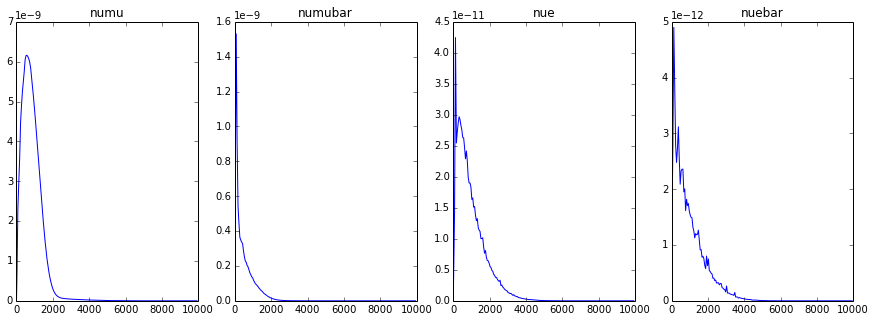

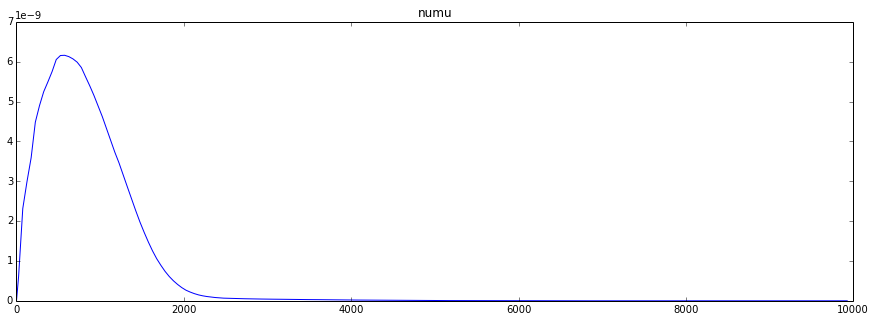

In [6]:
# Extracts data from a TH1 ROOT object and save it on a list
# List is then used to save data to an nparray which then will save data to file
# Original root data is in GeV vs. #nu/1e20POT/cm^2/0.05GeV\n'


fRoot = ROOT.TFile("numode_bnb_470m_r200.root","READ")
histo = [0]*4
figs = [0]*4
data = [[[0],[0]],[[0],[0]],[[0],[0]],[[0],[0]]]

histo[0] = fRoot.numu
histo[1] = fRoot.numubar
histo[2] = fRoot.nue
histo[3] = fRoot.nuebar
name = ['numu','numubar','nue','nuebar']

fig = plt.figure(figsize=(15,5), dpi=80)
for i in range(4):
    for j in range(1,histo[i].GetNbinsX()):
        energy = histo[i].GetBinCenter(j)*1000
        flux = histo[i].GetBinContent(j)*pow(100,2)/float(1e20)/50 # cm^2->m^2,1e20POT->POT, 0.05GeV->MeV
        data[i][0].append(energy)
        data[i][1].append(flux)
    figs[i] = fig.add_subplot(141+i)
    figs[i].plot(data[i][0],data[i][1])
    figs[i].set_title(name[i])

plt.show()

fig = plt.figure(figsize=(15,5), dpi=80)
plt.plot(data[0][0],data[0][1])
plt.title(name[0])
plt.show()

In [7]:
comm = '#Flux units are: #nu/POT/m^2/MeV\n'

npdata = [0]*4
for i in range(4):
    npdata[i]= np.zeros(len(data[i][0]), dtype=[('Energy','f8'),('Flux','f8')])
    npdata[i]['Energy'] = data[i][0]
    npdata[i]['Flux'] = data[i][1]
    
    np.savetxt("flux_"+name[i]+'.dat',npdata[i],delimiter=' ',fmt='%s',header='#Energy Flux',comments=comm)